In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/bromeliad/ \
/Users/earl/Desktop/bamboo')

os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/camelia/ \
/Users/earl/Desktop/cyclamen')

256

In [4]:
with open('p05_index_and_pools.pkl', 'rb') as f:
    lat_warmN, lat_warmS, lon_warmW, lon_warmE, \
    SAM_index_sorted_cleaned, warm_pool_sorted_cleaned, wind_pool_sorted_cleaned = \
    pickle.load(f)

print(SAM_index_sorted_cleaned)

['IPSL-CM5A-MR', 'IPSL-CM5A-LR', 'GFDL-CM3', 'FGOALS-s2', 'CMCC-CMS', 'CMCC-CM', 'MPI-ESM-MR', 'GFDL-ESM2M', 'ACCESS1-0', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'CanESM2', 'GFDL-ESM2G', 'ACCESS1-3', 'CSIRO-Mk3-6-0', 'HadGEM2-AO', 'MRI-ESM1', 'MRI-CGCM3', 'NorESM1-M', 'IPSL-CM5B-LR', 'CNRM-CM5']


In [5]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

hist_thetao_path = '/Users/earl/Desktop/cyclamen/historical/mon/ocean/thetao/latest/'
hist_tauuo_path = '/Users/earl/Desktop/bamboo/historical/mon/ocean/tauuo/latest/'
hist_thetao_list = sorted(os.listdir(hist_thetao_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))

rcp85_thetao_path = '/Users/earl/Desktop/cyclamen/rcp85/mon/ocean/thetao/latest/'
rcp85_tauuo_path = '/Users/earl/Desktop/bamboo/rcp85/mon/ocean/tauuo/latest/'
rcp85_thetao_list = sorted(os.listdir(rcp85_thetao_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))


p06_plot_MMM_and_scatter


In [12]:
thetao_hist = {}
thetao_rcp85 = {}
thetao_anom = {}
thetao_lat = {}
thetao_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

plot_list = sorted(SAM_index_sorted_cleaned)
print(plot_list)
for model in plot_list:
    print(model)
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
        
    if model in ['CESM1-WACCM']:
        r = '2'
    else:
        r = '1'
    thetao_rcp85_data = xr.open_dataset(
        rcp85_thetao_path + model + '_r' + r + 'i1p1_2080-2099mean_surf.nc', decode_times=False)
    tauuo_rcp85_data = xr.open_dataset(
        rcp85_tauuo_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)
    
    if model in ['CESM1-WACCM']:
        r = '1'
    else:
        r = '1'
    thetao_hist_data = xr.open_dataset(
        hist_thetao_path + model + '_r' + r + 'i1p1_1980-1999mean_surf.nc', decode_times=False)
    
    if model in ['EC-EARTH']:
        r = '2'
    tauuo_hist_data = xr.open_dataset(
        hist_tauuo_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)
    
    thetao_hist[model] = thetao_hist_data['thetao'][0,0,:,:]
    thetao_rcp85[model] = thetao_rcp85_data['thetao'][0,0,:,:]
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]
    thetao_anom[model] = thetao_rcp85[model]-thetao_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    if len(thetao_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][-1,:]
        else:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][0,:]
    else:
        thetao_lat[model] = thetao_hist_data['lat'][:]
        thetao_lon[model] = thetao_hist_data['lon'][:]
        
    if len(tauuo_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
        else:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
    else:
        tauuo_lat[model] = tauuo_hist_data['lat'][:]
        tauuo_lon[model] = tauuo_hist_data['lon'][:]
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        thetao_lon[model][0:100] += 360
        tauuo_lon[model][0:100] += 360
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        thetao_anom_now = thetao_anom[model]
        thetao_anom[model] = np.flipud(thetao_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        
        thetao_lat_now = thetao_lat[model]
        thetao_lat[model] = np.flipud(thetao_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        thetao_anom[model] = thetao_anom[model].where((thetao_anom[model] != 0), np.nan)
        
    print(model + ' OK!')
        
print(len(plot_list))   

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']
ACCESS1-0
ACCESS1-0 OK!
ACCESS1-3
ACCESS1-3 OK!
CMCC-CM
CMCC-CM OK!
CMCC-CMS
CMCC-CMS OK!
CNRM-CM5
CNRM-CM5 OK!
CSIRO-Mk3-6-0
CSIRO-Mk3-6-0 OK!
CanESM2
CanESM2 OK!
FGOALS-s2
FGOALS-s2 OK!
GFDL-CM3
GFDL-CM3 OK!
GFDL-ESM2G
GFDL-ESM2G OK!
GFDL-ESM2M
GFDL-ESM2M OK!
HadGEM2-AO
HadGEM2-AO OK!
IPSL-CM5A-LR
IPSL-CM5A-LR OK!
IPSL-CM5A-MR
IPSL-CM5A-MR OK!
IPSL-CM5B-LR
IPSL-CM5B-LR OK!
MIROC-ESM
MIROC-ESM OK!
MIROC-ESM-CHEM
MIROC-ESM-CHEM OK!
MPI-ESM-MR
MPI-ESM-MR OK!
MRI-CGCM3
MRI-CGCM3 OK!
MRI-ESM1
MRI-ESM1 OK!
NorESM1-M
NorESM1-M OK!
21


In [13]:
lon_unique = np.arange(100,170)
lat_unique = np.arange(-60,-20)

grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))

lat_N = -17
lat_S = -63
lon_W = 97
lon_E = 173

thetao_anom_unique = []
tauuo_anom_unique = []

for idx, t in enumerate(plot_list):
    print(t)
    
    thetao_lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    thetao_lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    thetao_lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    thetao_lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    thetao_grid_lon_now, thetao_grid_lat_now = np.meshgrid(
        thetao_lon[t][thetao_lon_W_idx:thetao_lon_E_idx], 
        thetao_lat[t][thetao_lat_S_idx:thetao_lat_N_idx])
    print(thetao_grid_lon_now.shape)
    print(thetao_grid_lat_now.shape)
    thetao_lon_flat = np.transpose(thetao_grid_lon_now.flatten('F'))
    thetao_lat_flat = thetao_grid_lat_now.flatten('F')
    thetao_flat_list = [thetao_lon_flat, thetao_lat_flat]    
    thetao_grid_points = np.transpose(thetao_flat_list)
    print(np.shape(thetao_grid_points))
    thetao_anom_now = thetao_anom[t][thetao_lat_S_idx:thetao_lat_N_idx,thetao_lon_W_idx:thetao_lon_E_idx]
    
    tauuo_lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    tauuo_lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    tauuo_lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    tauuo_lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    tauuo_grid_lon_now, tauuo_grid_lat_now = np.meshgrid(
        tauuo_lon[t][tauuo_lon_W_idx:tauuo_lon_E_idx], 
        tauuo_lat[t][tauuo_lat_S_idx:tauuo_lat_N_idx])
    tauuo_lon_flat = np.transpose(tauuo_grid_lon_now.flatten('F'))
    tauuo_lat_flat = tauuo_grid_lat_now.flatten('F')
    tauuo_flat_list = [tauuo_lon_flat, tauuo_lat_flat]    
    tauuo_grid_points = np.transpose(tauuo_flat_list)
    tauuo_anom_now = tauuo_anom[t][tauuo_lat_S_idx:tauuo_lat_N_idx,tauuo_lon_W_idx:tauuo_lon_E_idx]

    if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'HadGEM2-AO', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('lon', 'lat'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('lon', 'lat'))
    elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('rlon', 'rlat'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('rlon', 'rlat'))
    elif t in ['MPI-ESM-MR']:
        thetao_anom_now_flatten = thetao_anom_now.flatten('F')
        tauuo_anom_now_flatten = tauuo_anom_now.flatten('F')
    else:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('i', 'j'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('i', 'j'))
    
    print(np.shape(thetao_anom_now_flatten))
    
    thetao_anom_interp = interpolate.griddata(thetao_grid_points, thetao_anom_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    tauuo_anom_interp = interpolate.griddata(tauuo_grid_points, tauuo_anom_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    if idx == 0:
        thetao_anom_unique = thetao_anom_interp
        tauuo_anom_unique = tauuo_anom_interp
    else:
        thetao_anom_unique = np.dstack((thetao_anom_unique, thetao_anom_interp))
        tauuo_anom_unique = np.dstack((tauuo_anom_unique, tauuo_anom_interp)) 
    
print(np.shape(thetao_anom_unique))
print(thetao_anom_unique)


(40, 70)
ACCESS1-0
(53, 76)
(53, 76)
(4028, 2)
(4028,)
ACCESS1-3
(53, 76)
(53, 76)
(4028, 2)
(4028,)
CMCC-CM
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CMCC-CMS
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CNRM-CM5
(65, 76)
(65, 76)
(4940, 2)
(4940,)
CSIRO-Mk3-6-0
(49, 40)
(49, 40)
(1960, 2)
(1960,)
CanESM2
(49, 55)
(49, 55)
(2695, 2)
(2695,)
FGOALS-s2
(46, 76)
(46, 76)
(3496, 2)
(3496,)
GFDL-CM3
(48, 76)
(48, 76)
(3648, 2)
(3648,)
GFDL-ESM2G
(47, 76)
(47, 76)
(3572, 2)
(3572,)
GFDL-ESM2M
(48, 76)
(48, 76)
(3648, 2)
(3648,)
HadGEM2-AO
(47, 76)
(47, 76)
(3572, 2)
(3572,)
IPSL-CM5A-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5A-MR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5B-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
MIROC-ESM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MIROC-ESM-CHEM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MPI-ESM-MR
(118, 169)
(118, 169)
(19942, 2)
(19942,)
MRI-CGCM3
(92, 76)
(92, 76)
(6992, 2)
(6992,)
MRI-ESM1
(92, 76)
(92, 76)
(6992, 2)
(6992,)
NorESM1-M
(94, 68)
(94, 68)
(6392, 2)
(6392,)
(40, 

lat: -60
lat: -59
lat: -58
lat: -57
lat: -56
lat: -55
lat: -54
lat: -53
lat: -52
lat: -51
lat: -50
lat: -49
lat: -48
lat: -47
lat: -46
lat: -45
lat: -44
lat: -43
lat: -42
lat: -41
lat: -40
lat: -39
lat: -38
lat: -37
lat: -36
lat: -35
lat: -34
lat: -33
lat: -32
lat: -31
lat: -30
lat: -29
lat: -28
lat: -27
lat: -26
lat: -25
lat: -24
lat: -23
lat: -22
lat: -21
(40, 70)


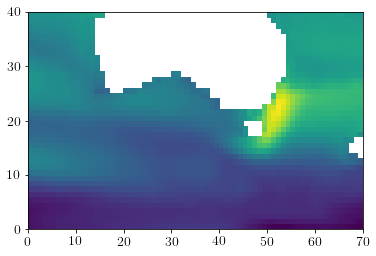

In [14]:
# Criteria for MMM:
good_tol = 12

thetao_anom_MMM = np.empty([40,70])
tauuo_anom_MMM = np.empty([40,70])
for y_idx,y in enumerate(lat_unique):
    print('lat: ' + str(y))
    
    for x_idx, x in enumerate(lon_unique):
        thetao_unique_now = thetao_anom_unique[y_idx][x_idx]
        tauuo_unique_now = tauuo_anom_unique[y_idx][x_idx]
        #print(thetao_unique_now)
        #print(np.shape(thetao_unique_now))
        thetao_idx = np.argwhere(np.isnan(thetao_unique_now))
        tauuo_idx = np.argwhere(np.isnan(tauuo_unique_now))
        #print(idx)
        #print(len(idx))
        if len(thetao_idx) <= good_tol:
            thetao_anom_MMM[y_idx, x_idx] = np.nanmean(thetao_unique_now)
        else:
            thetao_anom_MMM[y_idx, x_idx] = np.mean(thetao_unique_now)
        if len(tauuo_idx) <= good_tol:
            tauuo_anom_MMM[y_idx, x_idx] = np.nanmean(tauuo_unique_now)
        else:
            tauuo_anom_MMM[y_idx, x_idx] = np.mean(tauuo_unique_now)

print(np.shape(thetao_anom_MMM))
plt.pcolor(thetao_anom_MMM)

2.37755119136
-0.0158423293828


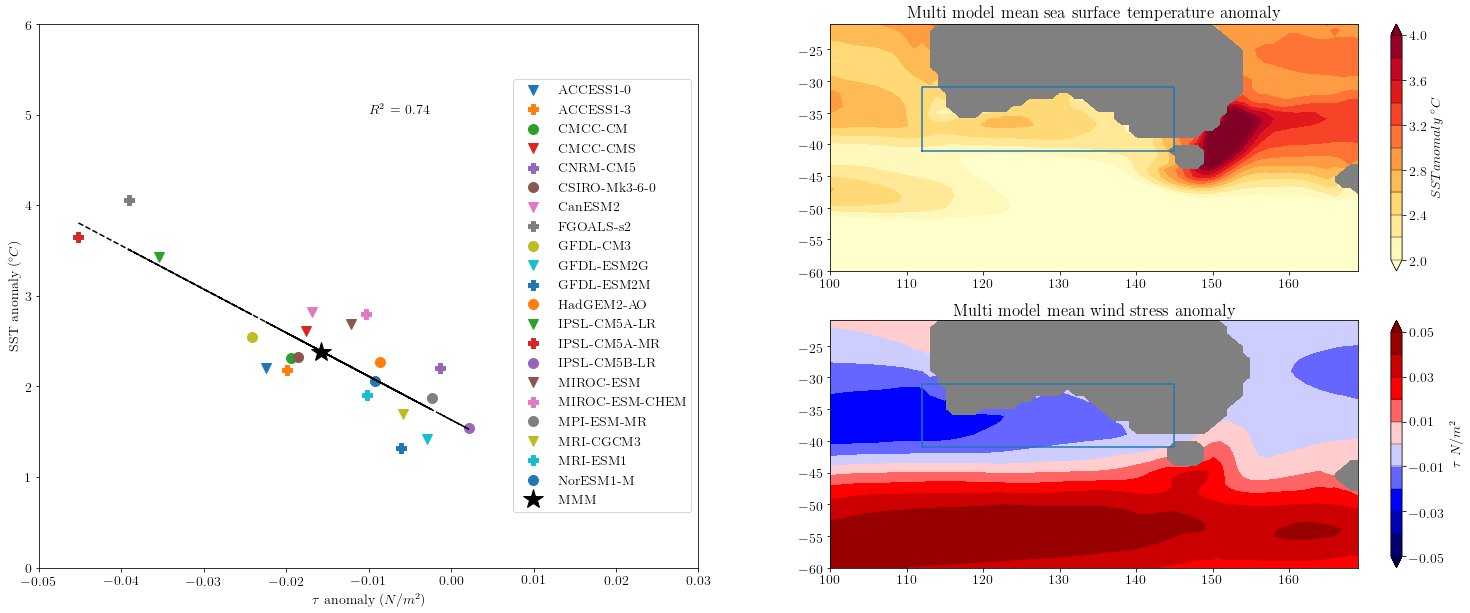

In [15]:
matplotlib.rcParams.update({'font.size': 14}) 
row = 2
col = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 10)
marker = itertools.cycle(('v', 'P', 'o')) 

ax = plt.subplot2grid((row, col), (0, 0), rowspan=2)
for idx, t in enumerate(plot_list):    
    plt.plot(wind_pool_sorted_cleaned[t] ,warm_pool_sorted_cleaned[t] , 
             marker = next(marker), markersize=10 ,linestyle='')

lat_warmN_idx = find_nearest_index(lat_unique, lat_warmN)
lat_warmS_idx = find_nearest_index(lat_unique, lat_warmS)
lon_warmW_idx = find_nearest_index(lon_unique, lon_warmW)
lon_warmE_idx = find_nearest_index(lon_unique, lon_warmE)

thetao_anom_MMM_mean = np.nanmean(
    thetao_anom_MMM[lat_warmS_idx:lat_warmN_idx,lon_warmW_idx:lon_warmE_idx])
print(thetao_anom_MMM_mean)
tauuo_anom_MMM_mean = np.nanmean(
    tauuo_anom_MMM[lat_warmS_idx:lat_warmN_idx,lon_warmW_idx:lon_warmE_idx])
print(tauuo_anom_MMM_mean)
plt.plot(tauuo_anom_MMM_mean, thetao_anom_MMM_mean ,
         marker = '*', markersize=20 ,linestyle='', color='k')

plot_list_legend = plot_list[:]
plot_list_legend.append('MMM')
plt.legend(plot_list_legend, loc='center right', bbox_to_anchor=(1.0, 0.5))

wind_pool_sorted_cleaned_values = list(wind_pool_sorted_cleaned.values())
warm_pool_sorted_cleaned_values = list(warm_pool_sorted_cleaned.values())
fit = np.polyfit(wind_pool_sorted_cleaned_values, warm_pool_sorted_cleaned_values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(wind_pool_sorted_cleaned_values, fit_fn(wind_pool_sorted_cleaned_values), '--k')
R2 = np.corrcoef(wind_pool_sorted_cleaned_values, warm_pool_sorted_cleaned_values)[0, 1]**2
ax.text(-0.01, 5, '$R^2$ = ' + str(np.round(R2*100)/100))

plt.xlabel(r'$\tau$ anomaly ($N/m^2$)')
plt.ylabel('SST anomaly ($^{\circ}C$)')
plt.xlim([-0.05, 0.03])
plt.ylim([0, 6])

ax = plt.subplot2grid((row, col), (0, 1))
cmap = plt.get_cmap('YlOrRd')
step = 0.2
contf_lvls = np.arange(2,4+1e-08,step)              
ax.set_facecolor('grey')
contf = plt.contourf(lon_unique, lat_unique, thetao_anom_MMM,
                     contf_lvls, cmap=cmap, extend='both')
plot = plt.plot(
    [lon_warmW,lon_warmE,lon_warmE,lon_warmW,lon_warmW], 
    [lat_warmS,lat_warmS,lat_warmN,lat_warmN,lat_warmS])
ax.set_title('Multi model mean sea surface temperature anomaly')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$SST anomaly$ $^{\circ}C$') 
cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])

ax = plt.subplot2grid((row, col), (1, 1))
cmap = plt.get_cmap('seismic')
step = 0.01
contf_lvls = np.arange(-0.05,0.05+1e-08,step)               
ax.set_facecolor('grey')
contf = plt.contourf(lon_unique, lat_unique, tauuo_anom_MMM,
                     contf_lvls, cmap=cmap, extend='both')
plot = plt.plot(
    [lon_warmW,lon_warmE,lon_warmE,lon_warmW,lon_warmW], 
    [lat_warmS,lat_warmS,lat_warmN,lat_warmN,lat_warmS])
ax.set_title('Multi model mean wind stress anomaly')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau$ $N/m^{2}$') 
cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])


output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)

plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)

In [58]:
print(plot_list)

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'FIO-ESM', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M', 'NorESM1-ME']
